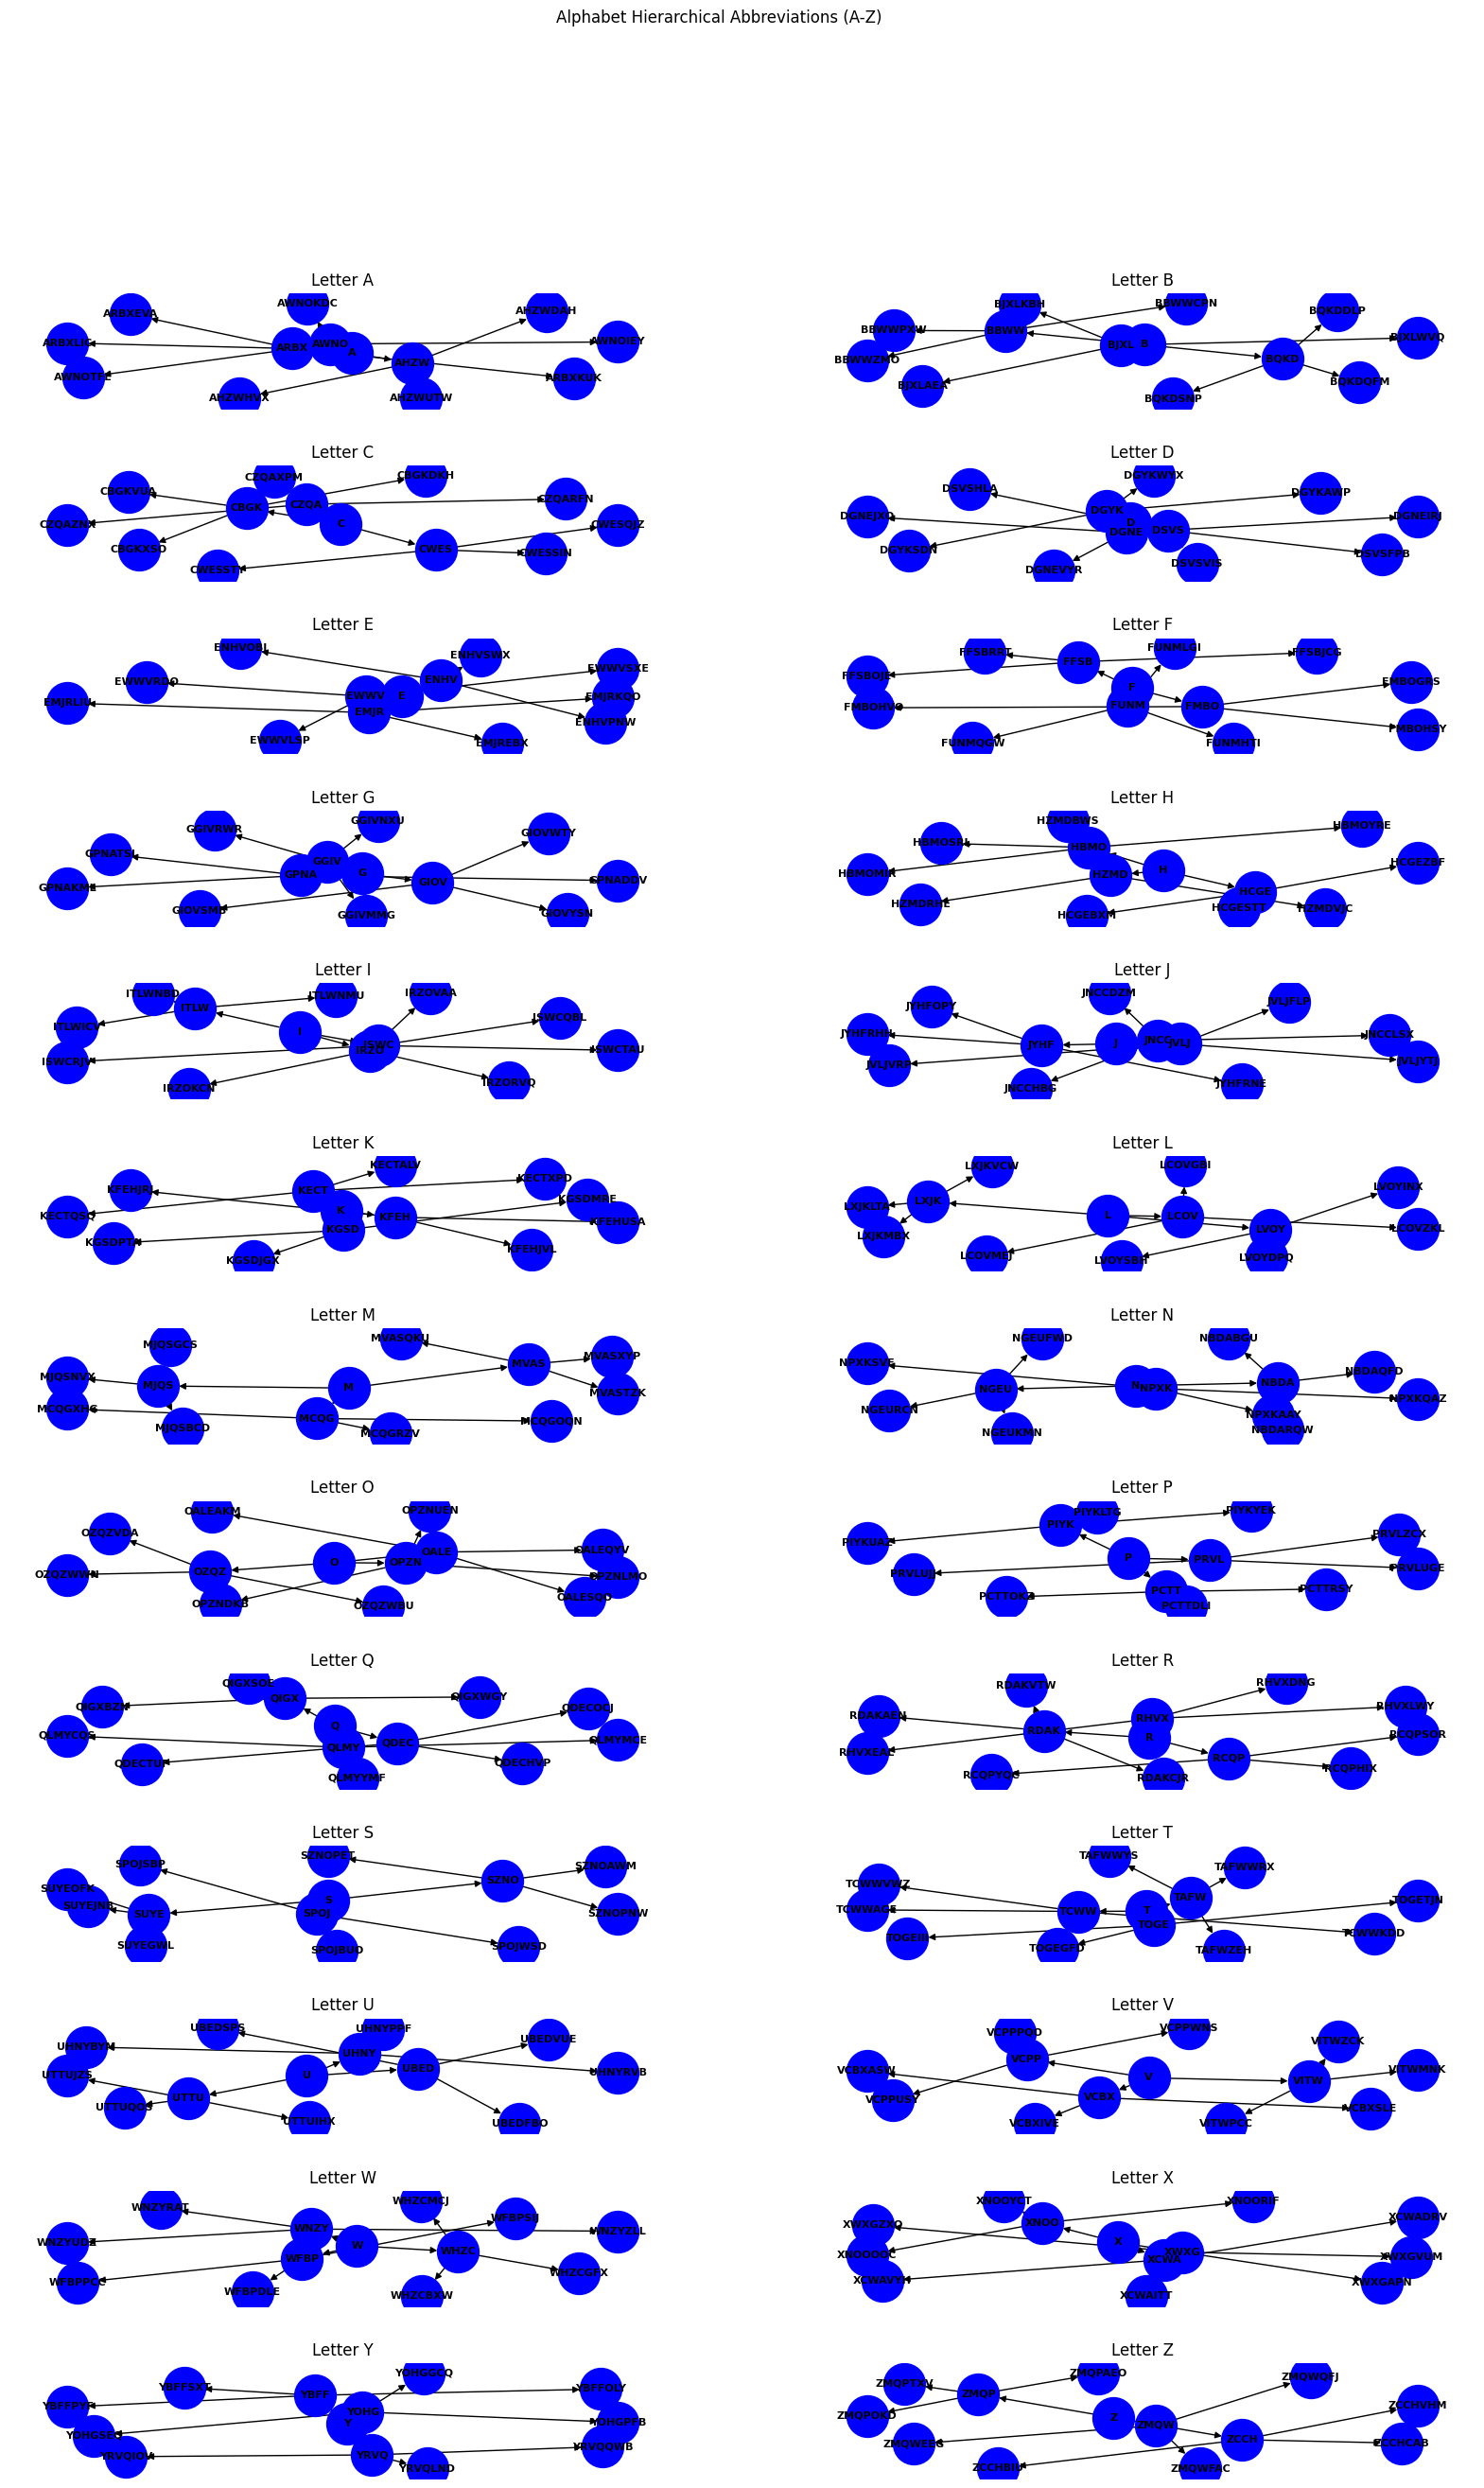

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import string


def generate_hierarchy_data(node, levels, max_levels, min_level):
    if levels >= max_levels:
        return []

    num_children = random.randint(min_level, 3)
    children = {}
    for _ in range(num_children):
        child = f"{node}{generate_abbreviation()}"
        children[child] = generate_hierarchy_data(child, levels + 1, max_levels, min_level)
    return children


def generate_abbreviation():
    abbreviation = ''.join(random.choices(string.ascii_uppercase, k=3))
    return abbreviation


def create_subplot_for_alphabet(min_level, max_level):
    num_rows = 13
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
    plt.subplots_adjust(hspace=0.5)

    for idx, letter in enumerate(string.ascii_uppercase):
        row = idx // num_cols
        col = idx % num_cols

        hierarchy_data = {letter: generate_hierarchy_data(letter, 0, max_level, min_level)}

        G = nx.DiGraph()
        for node, children in hierarchy_data.items():
            G.add_node(node)
            for child, grandchildren in children.items():
                G.add_node(child)
                G.add_edge(node, child)
                for grandchild in grandchildren:
                    G.add_node(grandchild)
                    G.add_edge(child, grandchild)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, ax=axes[row, col], with_labels=True, node_size=1000, node_color="blue", font_size=8, font_weight="bold", arrows=True)
        axes[row, col].set_title(f"Letter {letter}")

    plt.suptitle("Alphabet Hierarchical Abbreviations (A-Z)")
    plt.show()

min_level = 3
max_level = 5

create_subplot_for_alphabet(min_level, max_level)
